# Install libraries

In [1]:
pip install catboost

# Import libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import zipfile
import os
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
pd.set_option('display.max_columns', None)

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report

# load Data

In [3]:
zip_path = '/content/GiveMeSomeCredit.zip'
extract_path = '/content/extracted/'

os.makedirs(extract_path, exist_ok=True)

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("Extraction completed successfully!")

Extraction completed successfully!


In [4]:
df_train = pd.read_csv("/content/extracted/cs-training.csv")
df_test = pd.read_csv("/content/extracted/cs-test.csv")

# Data exploration

In [5]:
df_train.head()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [6]:
df_test.head()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,NaN,0.885519,43,0,0.177513,5700.0,4,0,0,0,0.0
1,2,NaN,0.463295,57,0,0.527237,9141.0,15,0,4,0,2.0
2,3,NaN,0.043275,59,0,0.687648,5083.0,12,0,1,0,2.0
3,4,NaN,0.280308,38,1,0.925961,3200.0,7,0,2,0,0.0
4,5,NaN,1.000000,27,0,0.019917,3865.0,4,0,0,0,1.0


In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 12 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   Unnamed: 0                            150000 non-null  int64  
 1   SeriousDlqin2yrs                      150000 non-null  int64  
 2   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 3   age                                   150000 non-null  int64  
 4   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 5   DebtRatio                             150000 non-null  float64
 6   MonthlyIncome                         120269 non-null  float64
 7   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 8   NumberOfTimes90DaysLate               150000 non-null  int64  
 9   NumberRealEstateLoansOrLines          150000 non-null  int64  
 10  NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 11  

In [8]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101503 entries, 0 to 101502
Data columns (total 12 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   Unnamed: 0                            101503 non-null  int64  
 1   SeriousDlqin2yrs                      0 non-null       float64
 2   RevolvingUtilizationOfUnsecuredLines  101503 non-null  float64
 3   age                                   101503 non-null  int64  
 4   NumberOfTime30-59DaysPastDueNotWorse  101503 non-null  int64  
 5   DebtRatio                             101503 non-null  float64
 6   MonthlyIncome                         81400 non-null   float64
 7   NumberOfOpenCreditLinesAndLoans       101503 non-null  int64  
 8   NumberOfTimes90DaysLate               101503 non-null  int64  
 9   NumberRealEstateLoansOrLines          101503 non-null  int64  
 10  NumberOfTime60-89DaysPastDueNotWorse  101503 non-null  int64  
 11  

In [9]:
df_train.columns

Index(['Unnamed: 0', 'SeriousDlqin2yrs',
       'RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents'],
      dtype='object')

# Data processing

In [10]:
missing_values = df_train.isnull().sum()
filtered_df = missing_values [missing_values  > 0]
filtered_df = pd.DataFrame(filtered_df)
filtered_df

,0
MonthlyIncome,29731
NumberOfDependents,3924


In [11]:
df_train.dropna(inplace=True)

In [12]:
missing_values = df_train.isnull().sum()
filtered_df = missing_values [missing_values  > 0]
filtered_df = pd.DataFrame(filtered_df)
filtered_df

,0


In [13]:
missing_values = df_test.isnull().sum()
filtered_df = missing_values [missing_values  > 0]
filtered_df = pd.DataFrame(filtered_df)
filtered_df

,0
SeriousDlqin2yrs,101503
MonthlyIncome,20103
NumberOfDependents,2626


In [14]:
df_test.dropna(inplace=True)

In [15]:
missing_values = df_test.isnull().sum()
filtered_df = missing_values [missing_values  > 0]
filtered_df = pd.DataFrame(filtered_df)
filtered_df

,0


In [16]:
# numeric_cols = [
#     'RevolvingUtilizationOfUnsecuredLines',
#     'age',
#     'NumberOfTime30-59DaysPastDueNotWorse',
#     'DebtRatio',
#     'MonthlyIncome',
#     'NumberOfOpenCreditLinesAndLoans',
#     'NumberOfTimes90DaysLate',
#     'NumberRealEstateLoansOrLines',
#     'NumberOfTime60-89DaysPastDueNotWorse',
#     'NumberOfDependents'
# ]

# outliers = pd.DataFrame()

# for col in numeric_cols:
#     Q1 = df_train[col].quantile(0.25)
#     Q3 = df_train[col].quantile(0.75)
#     IQR = Q3 - Q1
#     lower_bound = Q1 - 1.5 * IQR
#     upper_bound = Q3 + 1.5 * IQR

#     outliers[col + '_outlier'] = ((df_train[col] < lower_bound) | (df_train[col] > upper_bound))

# outlier_counts = outliers.sum().sort_values(ascending=False)
# print("Number of outliers in each column:")
# print(outlier_counts)

In [17]:
# # Remove rows containing any outlier
# df_clean = df_train[~outliers.any(axis=1)].reset_index(drop=True)

# # Print the number of rows before and after removal
# print(f"Number of rows before removal: {df_train.shape[0]}")
# print(f"Number of rows after removal: {df_clean.shape[0]}")

In [18]:
# numeric_cols = [
#     'RevolvingUtilizationOfUnsecuredLines',
#     'age',
#     'NumberOfTime30-59DaysPastDueNotWorse',
#     'DebtRatio',
#     'MonthlyIncome',
#     'NumberOfOpenCreditLinesAndLoans',
#     'NumberOfTimes90DaysLate',
#     'NumberRealEstateLoansOrLines',
#     'NumberOfTime60-89DaysPastDueNotWorse',
#     'NumberOfDependents'
# ]

# outliers_test = pd.DataFrame()

# for col in numeric_cols:
#     Q1 = df_train[col].quantile(0.25)
#     Q3 = df_train[col].quantile(0.75)
#     IQR = Q3 - Q1
#     lower_bound = Q1 - 1.5 * IQR
#     upper_bound = Q3 + 1.5 * IQR

#     outliers_test[col + '_outlier'] = ((df_test[col] < lower_bound) | (df_test[col] > upper_bound))

# outlier_counts_test = outliers_test.sum().sort_values(ascending=False)

# print("Number of outliers in test data:")
# print(outlier_counts_test)

In [19]:
# df_train = df_clean

In [20]:
df_train.duplicated().sum()

np.int64(0)

In [21]:
df_test.duplicated().sum()

np.int64(0)

# data analysis

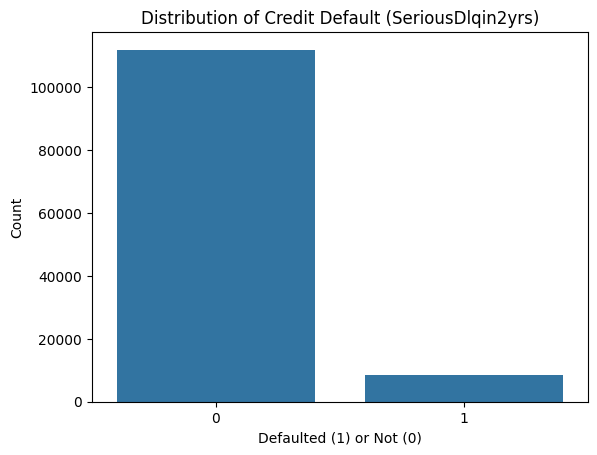

In [22]:
sns.countplot(x='SeriousDlqin2yrs', data=df_train)
plt.title('Distribution of Credit Default (SeriousDlqin2yrs)')
plt.xlabel('Defaulted (1) or Not (0)')
plt.ylabel('Count')
plt.show()

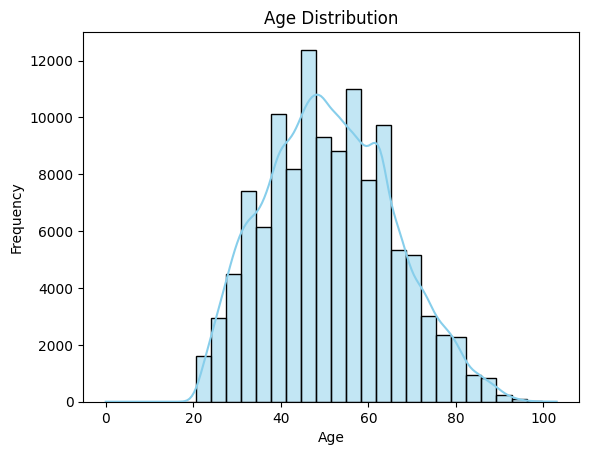

In [23]:
sns.histplot(df_train['age'], bins=30, kde=True, color='skyblue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

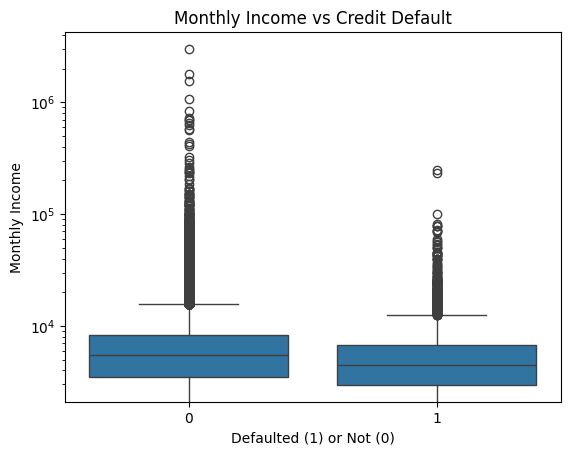

In [24]:
sns.boxplot(x='SeriousDlqin2yrs', y='MonthlyIncome', data=df_train)
plt.title('Monthly Income vs Credit Default')
plt.xlabel('Defaulted (1) or Not (0)')
plt.ylabel('Monthly Income')
plt.yscale('log')  # لتقليل تأثير القيم العالية
plt.show()

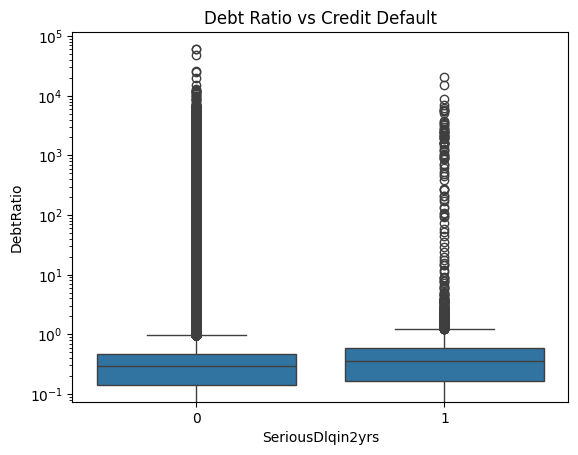

In [25]:
sns.boxplot(x='SeriousDlqin2yrs', y='DebtRatio', data=df_train)
plt.title('Debt Ratio vs Credit Default')
plt.yscale('log')  # اختياري: لتحسين وضوح الرسم
plt.show()

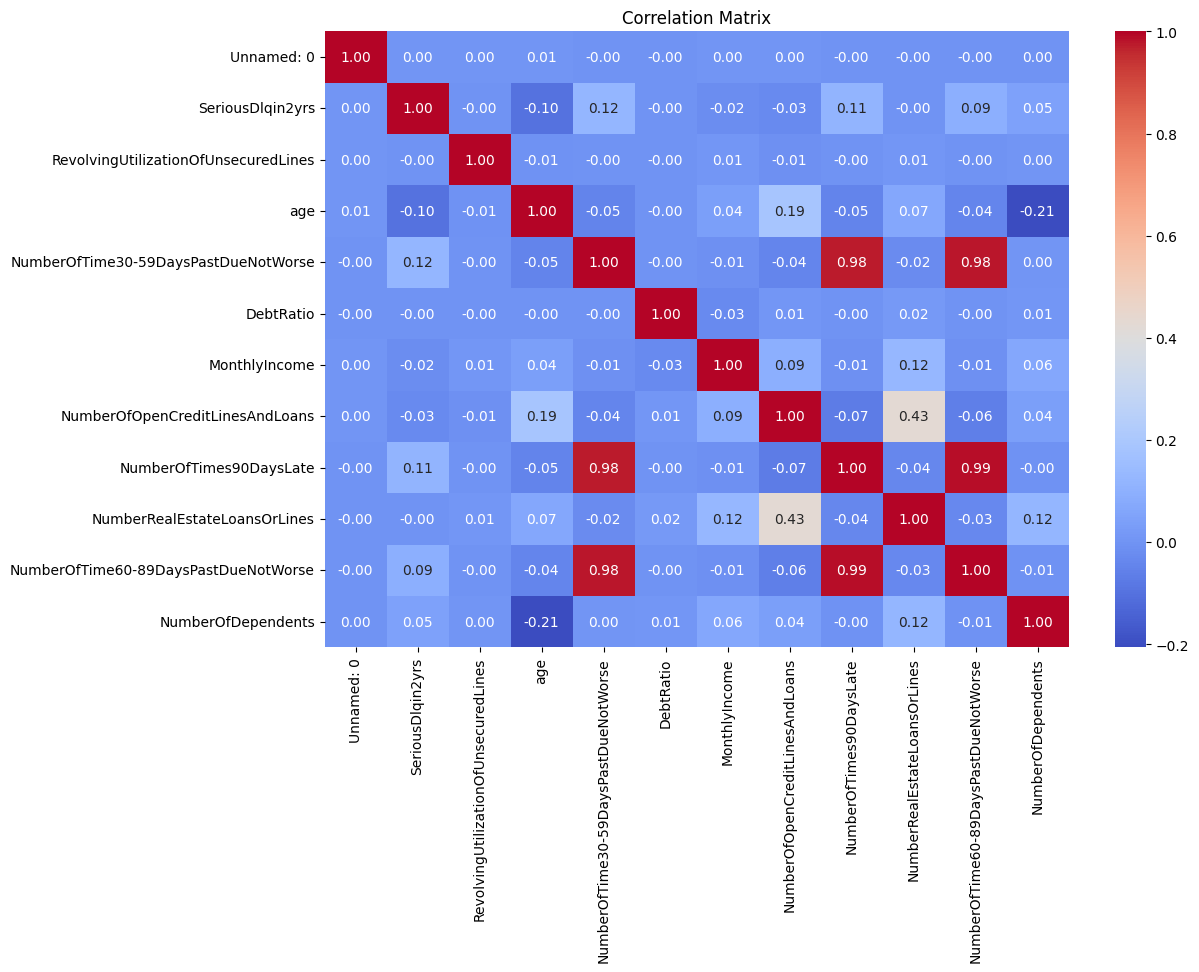

In [26]:
plt.figure(figsize=(12, 8))
sns.heatmap(df_train.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

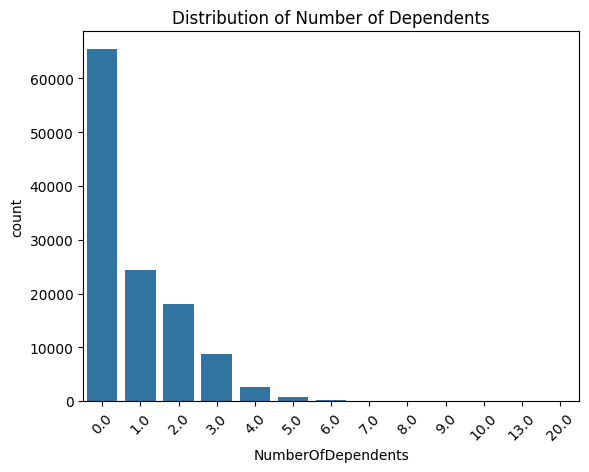

In [27]:
sns.countplot(x='NumberOfDependents', data=df_train)
plt.title('Distribution of Number of Dependents')
plt.xticks(rotation=45)
plt.show()

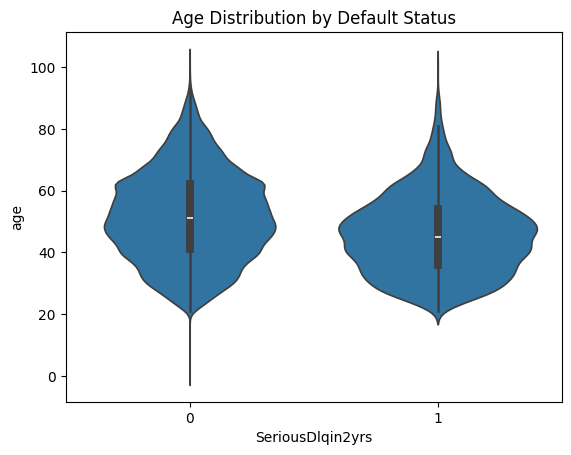

In [28]:
sns.violinplot(x='SeriousDlqin2yrs', y='age', data=df_train)
plt.title('Age Distribution by Default Status')
plt.show()

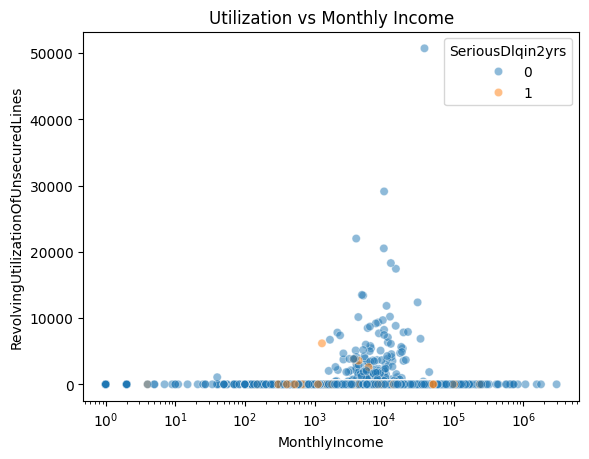

In [29]:
sns.scatterplot(x='MonthlyIncome', y='RevolvingUtilizationOfUnsecuredLines',
                hue='SeriousDlqin2yrs', data=df_train, alpha=0.5)
plt.title('Utilization vs Monthly Income')
plt.xscale('log')
plt.show()

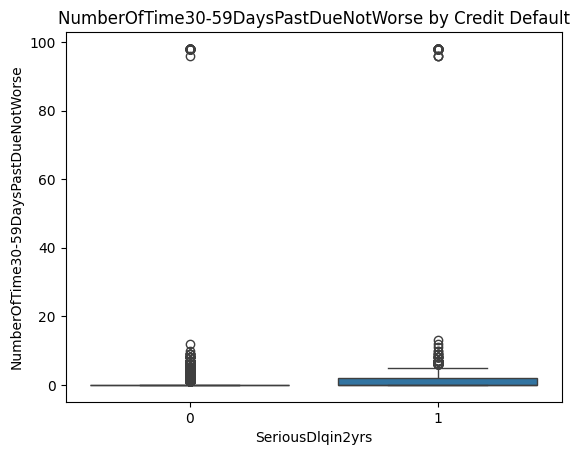

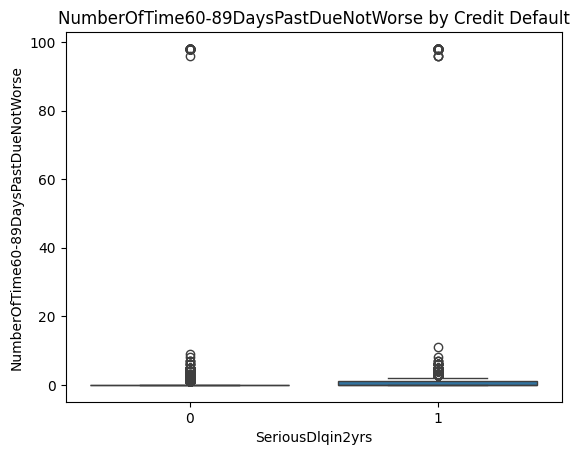

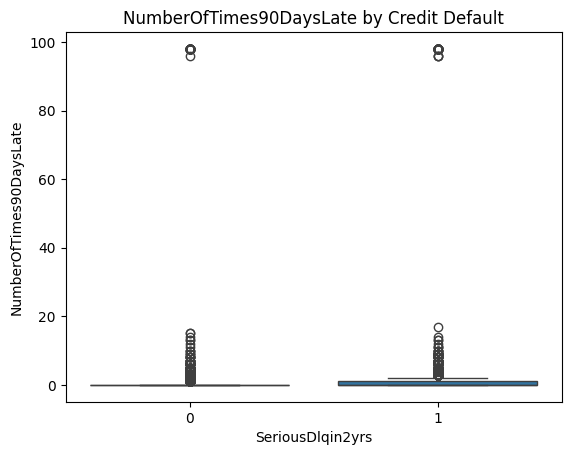

In [30]:
delay_cols = [
    'NumberOfTime30-59DaysPastDueNotWorse',
    'NumberOfTime60-89DaysPastDueNotWorse',
    'NumberOfTimes90DaysLate'
]

for col in delay_cols:
    sns.boxplot(x='SeriousDlqin2yrs', y=col, data=df_train)
    plt.title(f'{col} by Credit Default')
    plt.show()

# Data processing for Model

In [31]:
df_train.SeriousDlqin2yrs.value_counts()

,count
SeriousDlqin2yrs,
0,111912
1,8357


In [32]:
from sklearn.utils import resample

X = df_train.drop('SeriousDlqin2yrs', axis=1)
y = df_train['SeriousDlqin2yrs']

X_train, X_val, y_train, y_val = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

train_data = pd.concat([X_train, y_train], axis=1)

majority = train_data[train_data['SeriousDlqin2yrs'] == 0]
minority = train_data[train_data['SeriousDlqin2yrs'] == 1]

majority_downsampled = resample(majority,
                                replace=False,
                                n_samples=len(minority),
                                random_state=42)

balanced_train = pd.concat([majority_downsampled, minority])

X_train_resampled = balanced_train.drop('SeriousDlqin2yrs', axis=1)
y_train_resampled = balanced_train['SeriousDlqin2yrs']

print("Class distribution after balancing:")
print(y_train_resampled.value_counts())

Class distribution after balancing:
SeriousDlqin2yrs
0    6686
1    6686
Name: count, dtype: int64


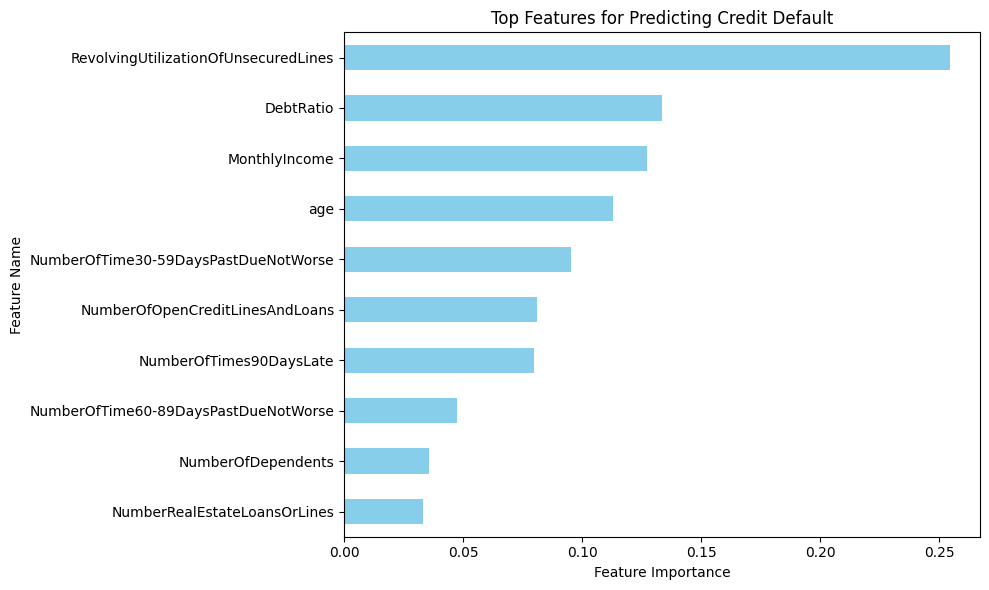

Best features:
 ['RevolvingUtilizationOfUnsecuredLines', 'DebtRatio', 'MonthlyIncome', 'age', 'NumberOfTime30-59DaysPastDueNotWorse', 'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate', 'NumberOfTime60-89DaysPastDueNotWorse', 'NumberOfDependents', 'NumberRealEstateLoansOrLines']


In [33]:
from sklearn.ensemble import RandomForestClassifier

X = X_train_resampled.drop('Unnamed: 0', axis=1, errors='ignore')
y = y_train_resampled

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X, y)

importances = pd.Series(model.feature_importances_, index=X.columns)

top_features = importances.sort_values(ascending=False).head(15)

plt.figure(figsize=(10, 6))
top_features.plot(kind='barh', color='skyblue')
plt.gca().invert_yaxis()
plt.title('Top Features for Predicting Credit Default')
plt.xlabel('Feature Importance')
plt.ylabel('Feature Name')
plt.tight_layout()
plt.show()

print("Best features:\n", top_features.index.tolist())

In [34]:
top_features = importances.sort_values(ascending=False).head(15)
print(top_features)

RevolvingUtilizationOfUnsecuredLines    0.254497
DebtRatio                               0.133432
MonthlyIncome                           0.127180
age                                     0.112865
NumberOfTime30-59DaysPastDueNotWorse    0.095227
NumberOfOpenCreditLinesAndLoans         0.080935
NumberOfTimes90DaysLate                 0.079631
NumberOfTime60-89DaysPastDueNotWorse    0.047430
NumberOfDependents                      0.035698
NumberRealEstateLoansOrLines            0.033104
dtype: float64


In [35]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neural_network import MLPClassifier

# Model building

In [36]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

selected_features = [
    'RevolvingUtilizationOfUnsecuredLines',
    'DebtRatio',
    'MonthlyIncome',
    'age',
    'NumberOfTime30-59DaysPastDueNotWorse',
    'NumberOfOpenCreditLinesAndLoans',
    'NumberOfTimes90DaysLate',
    'NumberOfTime60-89DaysPastDueNotWorse',
    'NumberOfDependents',
    'NumberRealEstateLoansOrLines'
]

X_train_selected = X_train_resampled[selected_features]
y_train_selected = y_train_resampled

X_val_selected = X_val[selected_features]
y_val_selected = y_val

model = LGBMClassifier(random_state=42)
model.fit(X_train_selected, y_train_selected)

y_train_pred = model.predict(X_train_selected)
y_val_pred = model.predict(X_val_selected)

print("Training Accuracy:", accuracy_score(y_train_selected, y_train_pred))
print("Validation Accuracy:", accuracy_score(y_val_selected, y_val_pred))

print("\nClassification Report (Validation):\n", classification_report(y_val_selected, y_val_pred))
print("Confusion Matrix (Validation):\n", confusion_matrix(y_val_selected, y_val_pred))


[LightGBM] [Info] Number of positive: 6686, number of negative: 6686
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002255 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 944
[LightGBM] [Info] Number of data points in the train set: 13372, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
Training Accuracy: 0.8223900688004786
Validation Accuracy: 0.7946703251018542

Classification Report (Validation):
               precision    recall  f1-score   support

           0       0.98      0.80      0.88     22383
           1       0.22      0.75      0.34      1671

    accuracy                           0.79     24054
   macro avg       0.60      0.77      0.61     24054
weighted avg       0.92      0.79      0.84     24054

Confusion Matrix (Validation):
 [[17866  4517]
 [  422  1249]]
